<a href="https://colab.research.google.com/github/Harshit-tech9/Telecom_Churn_Case_Study/blob/main/Telecom_Case_study_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
# importing all the necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
# from sklearn.metrics import plot_confusion_matrix

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)

In [3]:
df_1 = pd.read_csv('/content/churn_data.csv')
df_1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_2 = pd.read_csv('/content/customer_data.csv')
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
df_3 = pd.read_csv('/content/internet_data.csv')
df_3.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


# Merging all the dataframe in to one single dataframe

In [6]:
merge = pd.merge(df_1, df_2, how='inner', on = 'customerID')
merge.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [7]:
telec = pd.merge(merge, df_3, how='inner', on = 'customerID')
telec.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [8]:
telec.shape

(7043, 21)

In [9]:
telec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


## General Observation
1. There are no null values present in our dataframe.
2. There are 7043 rows and 21 features in our dataframe.


In [10]:
telec.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


## Mapping some of the binary variable.

In [11]:
list_var = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

def to_binary(x):
  return x.map({'Yes': 1, 'No': 0})

telec[list_var] = telec[list_var].apply(to_binary)

telec.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [12]:
dummy1 = pd.get_dummies(telec[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)
telec = pd.concat([telec, dummy1], axis=1)
telec.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0


### Checking the value counts of rest categorical other variable

In [13]:
telec['StreamingMovies'].astype('category').value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [14]:
telec['StreamingTV'].astype('category').value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [15]:
telec['TechSupport'].astype('category').value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [16]:
telec['DeviceProtection'].astype('category').value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [17]:
telec['OnlineSecurity'].astype('category').value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [18]:
telec['InternetService'].astype('category').value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [19]:
telec['OnlineBackup'].astype('category').value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [20]:
telec['MultipleLines'].astype('category').value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

General observation in internet service we have 1526 No count. Now Online Backup, device protection, Online Backup, Device security, has a same No count so we can say all those variable are redundant variable and we do not need it, as Internet service indicate all those variable.

In [21]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telec['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telec = pd.concat([telec,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telec['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telec = pd.concat([telec,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telec['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telec = pd.concat([telec,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'.
dp = pd.get_dummies(telec['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telec = pd.concat([telec,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'.
ts = pd.get_dummies(telec['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telec = pd.concat([telec,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telec['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telec = pd.concat([telec,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'.
sm = pd.get_dummies(telec['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telec = pd.concat([telec,sm1], axis=1)

<ipython-input-21-bfde21656ce6>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['MultipleLines_No phone service'], 1)
<ipython-input-21-bfde21656ce6>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  os1 = os.drop(['OnlineSecurity_No internet service'], 1)
<ipython-input-21-bfde21656ce6>:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
<ipython-input-21-bfde21656ce6>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
<ipython-input-21-bfde21656ce6>:30: FutureWarning: In a future version of pandas all arguments of

In [22]:
telec.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


## Now dropping all the repeating variable

In [23]:
telec.drop(columns=['Contract', 'PaymentMethod', 'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies'], inplace = True)
telec.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


Now Checking the Null values in the telec dataframe.

In [24]:
telec.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [25]:
#The varaible was imported as a string we need to convert it to float
telec['TotalCharges'] = pd.to_numeric(telec['TotalCharges'], errors="coerce")

In [26]:
telec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [27]:
# Removing NaN TotalCharges rows
telec = telec[~np.isnan(telec['TotalCharges'])]

In [28]:
telec[['TotalCharges', 'tenure', 'MonthlyCharges', 'SeniorCitizen']].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00


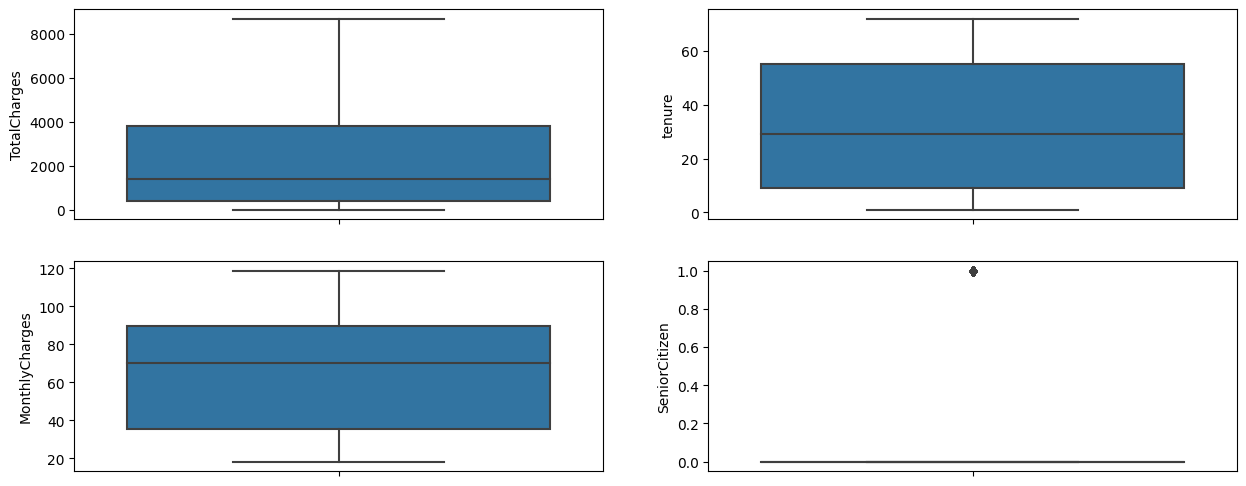

In [29]:
fig, ax = plt.subplots(2,2,figsize=(15,6))
sns.boxplot(y = 'TotalCharges', data = telec, ax = ax[0][0])
sns.boxplot(y = 'tenure', data = telec, ax = ax[0][1])
sns.boxplot(y = 'MonthlyCharges', data = telec, ax = ax[1][0])
sns.boxplot(y = 'SeniorCitizen', data = telec, ax = ax[1][1])
plt.show()

There are no outliers present in our dataset.

# Train Test Split

In [30]:
# dropping the column customerID and Churn, Churn is our target variable.
X = telec.drop(columns=['Churn', 'customerID'])

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [31]:
# setting churn as ouy target variable
y = telec[['Churn']]

y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [32]:
# Splitting the data into train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Feature Scaling

There are no outliers present in our dataset therefore we will choose the standarad scaler for feature scaling.

In [33]:
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
2790,0.723700,1,1,1.483236,1.441721,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
898,-0.829194,1,1,1.126921,-0.508566,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1
3965,0.805431,1,1,1.378827,1.472845,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1
5201,-0.951790,1,1,-1.491582,-0.929575,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1274,1.214088,1,1,1.201498,1.920335,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1


In [34]:
### Checking the Churn Rate
churn = (sum(telec['Churn'])/len(telec['Churn'].index))*100
churn

26.578498293515356

Here, our churn rate is 27%, we need a perfect balance class of 50 - 50. But this is neither imbalaced nor balanced there we will not apply any balancing techniques here.

# Understanding the correlation.

<ipython-input-35-acfcc1d4cb7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = telec.corr(), annot=True)


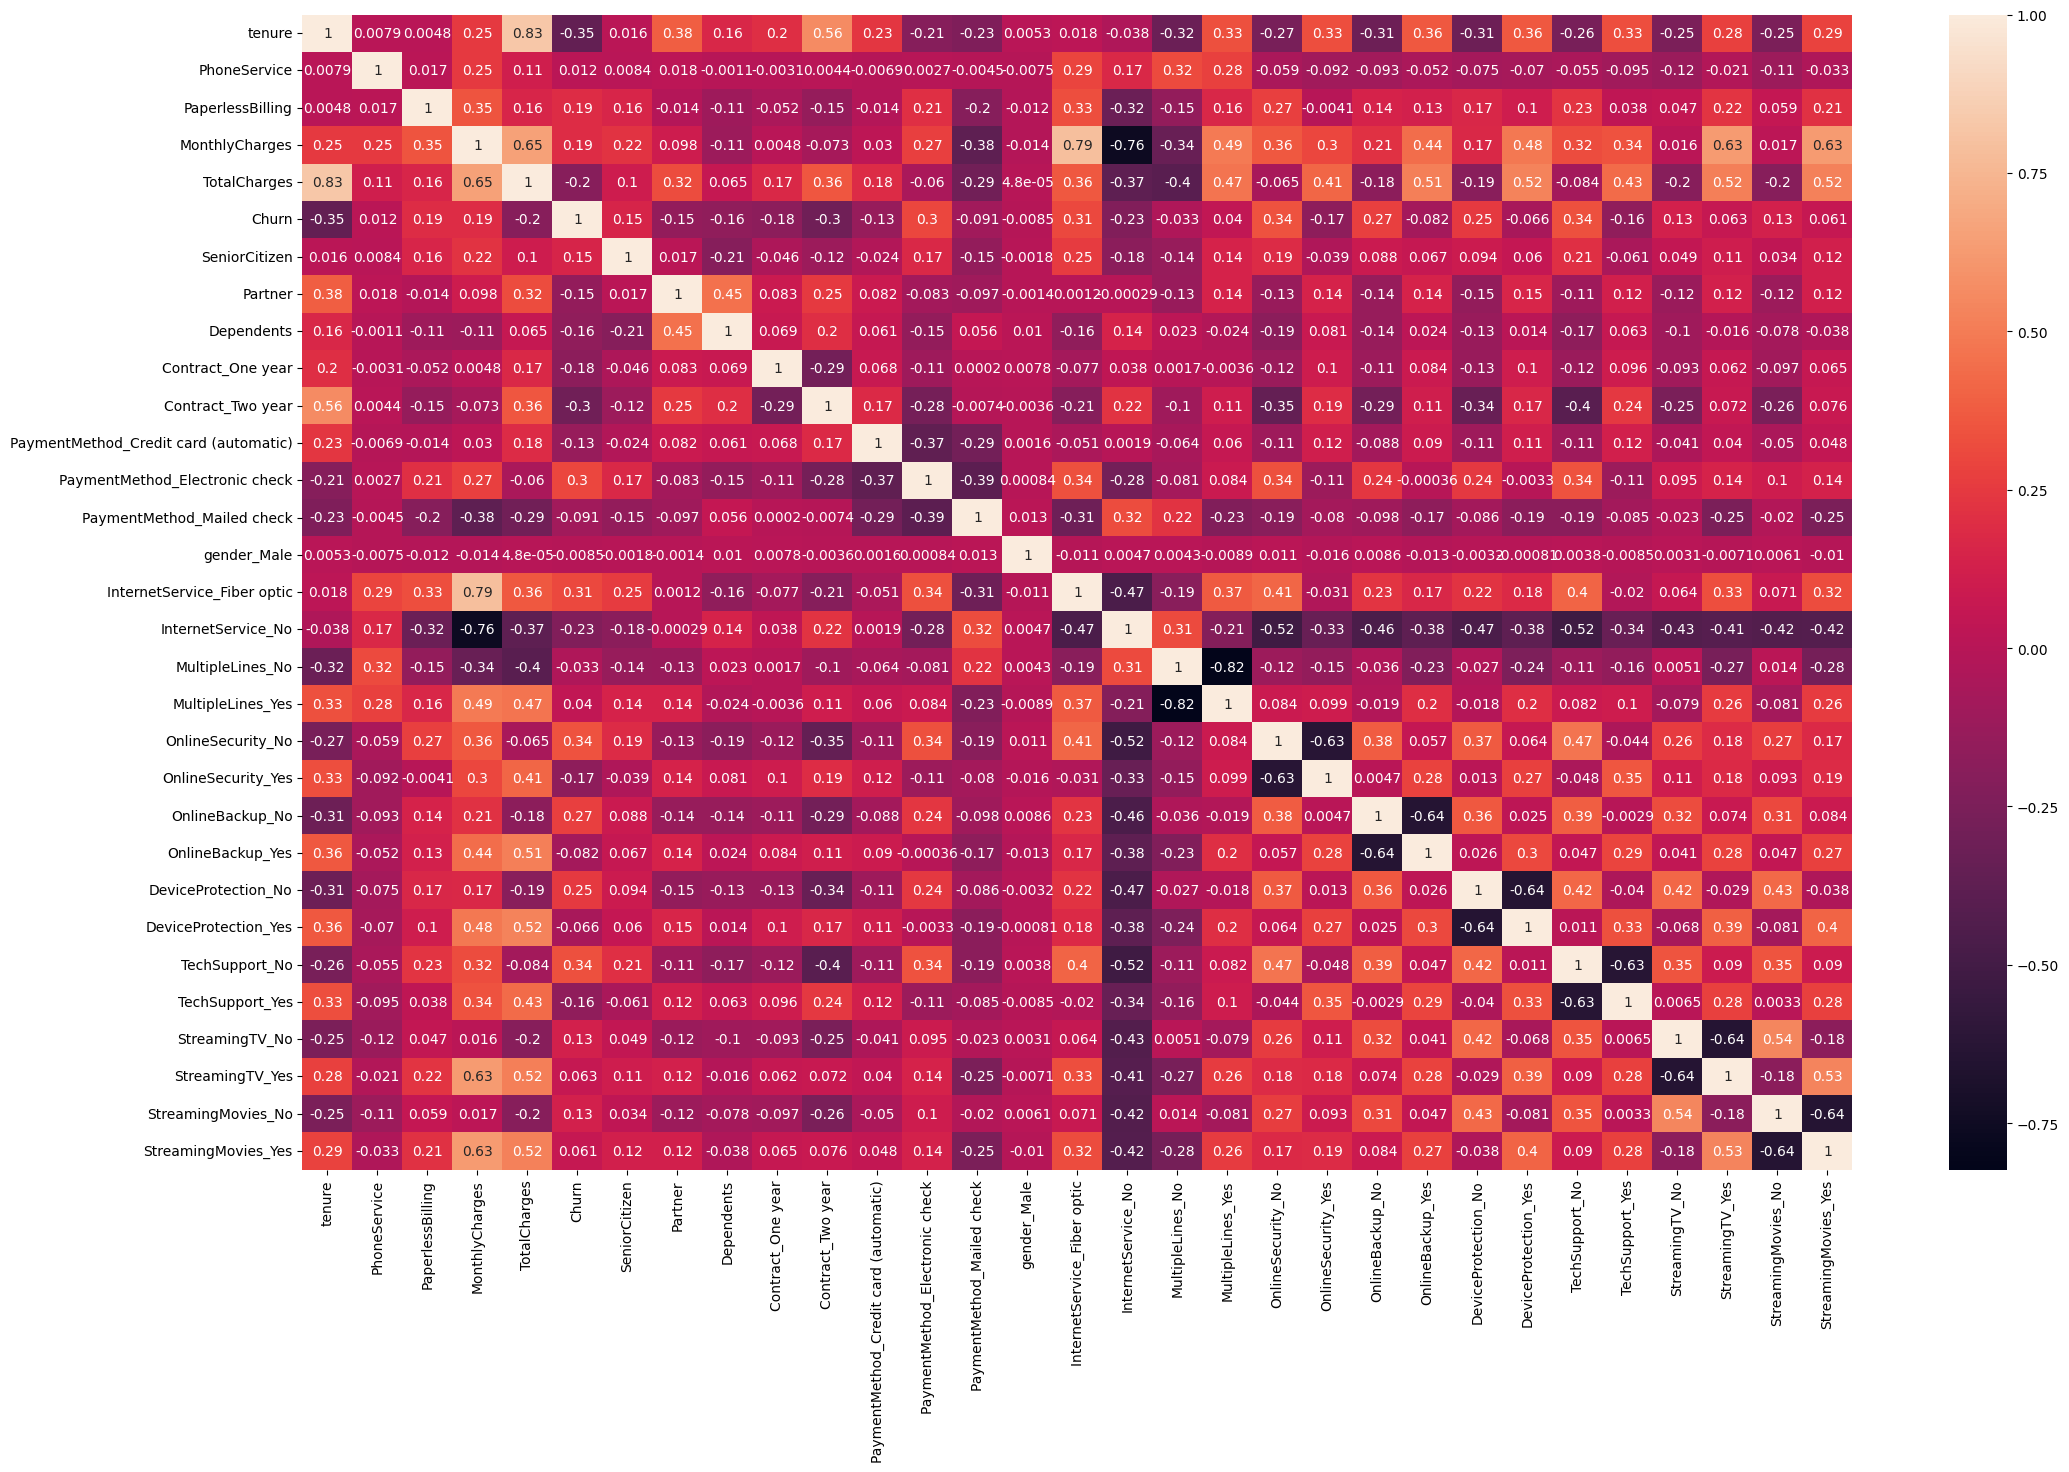

In [35]:
plt.figure(figsize=(25, 15))
sns.heatmap(data = telec.corr(), annot=True)
plt.show()

**Dropping the highly correlated variable.**

In [36]:
X_test = X_test.drop(columns = ['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'])
X_train = X_train.drop(columns = ['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'])

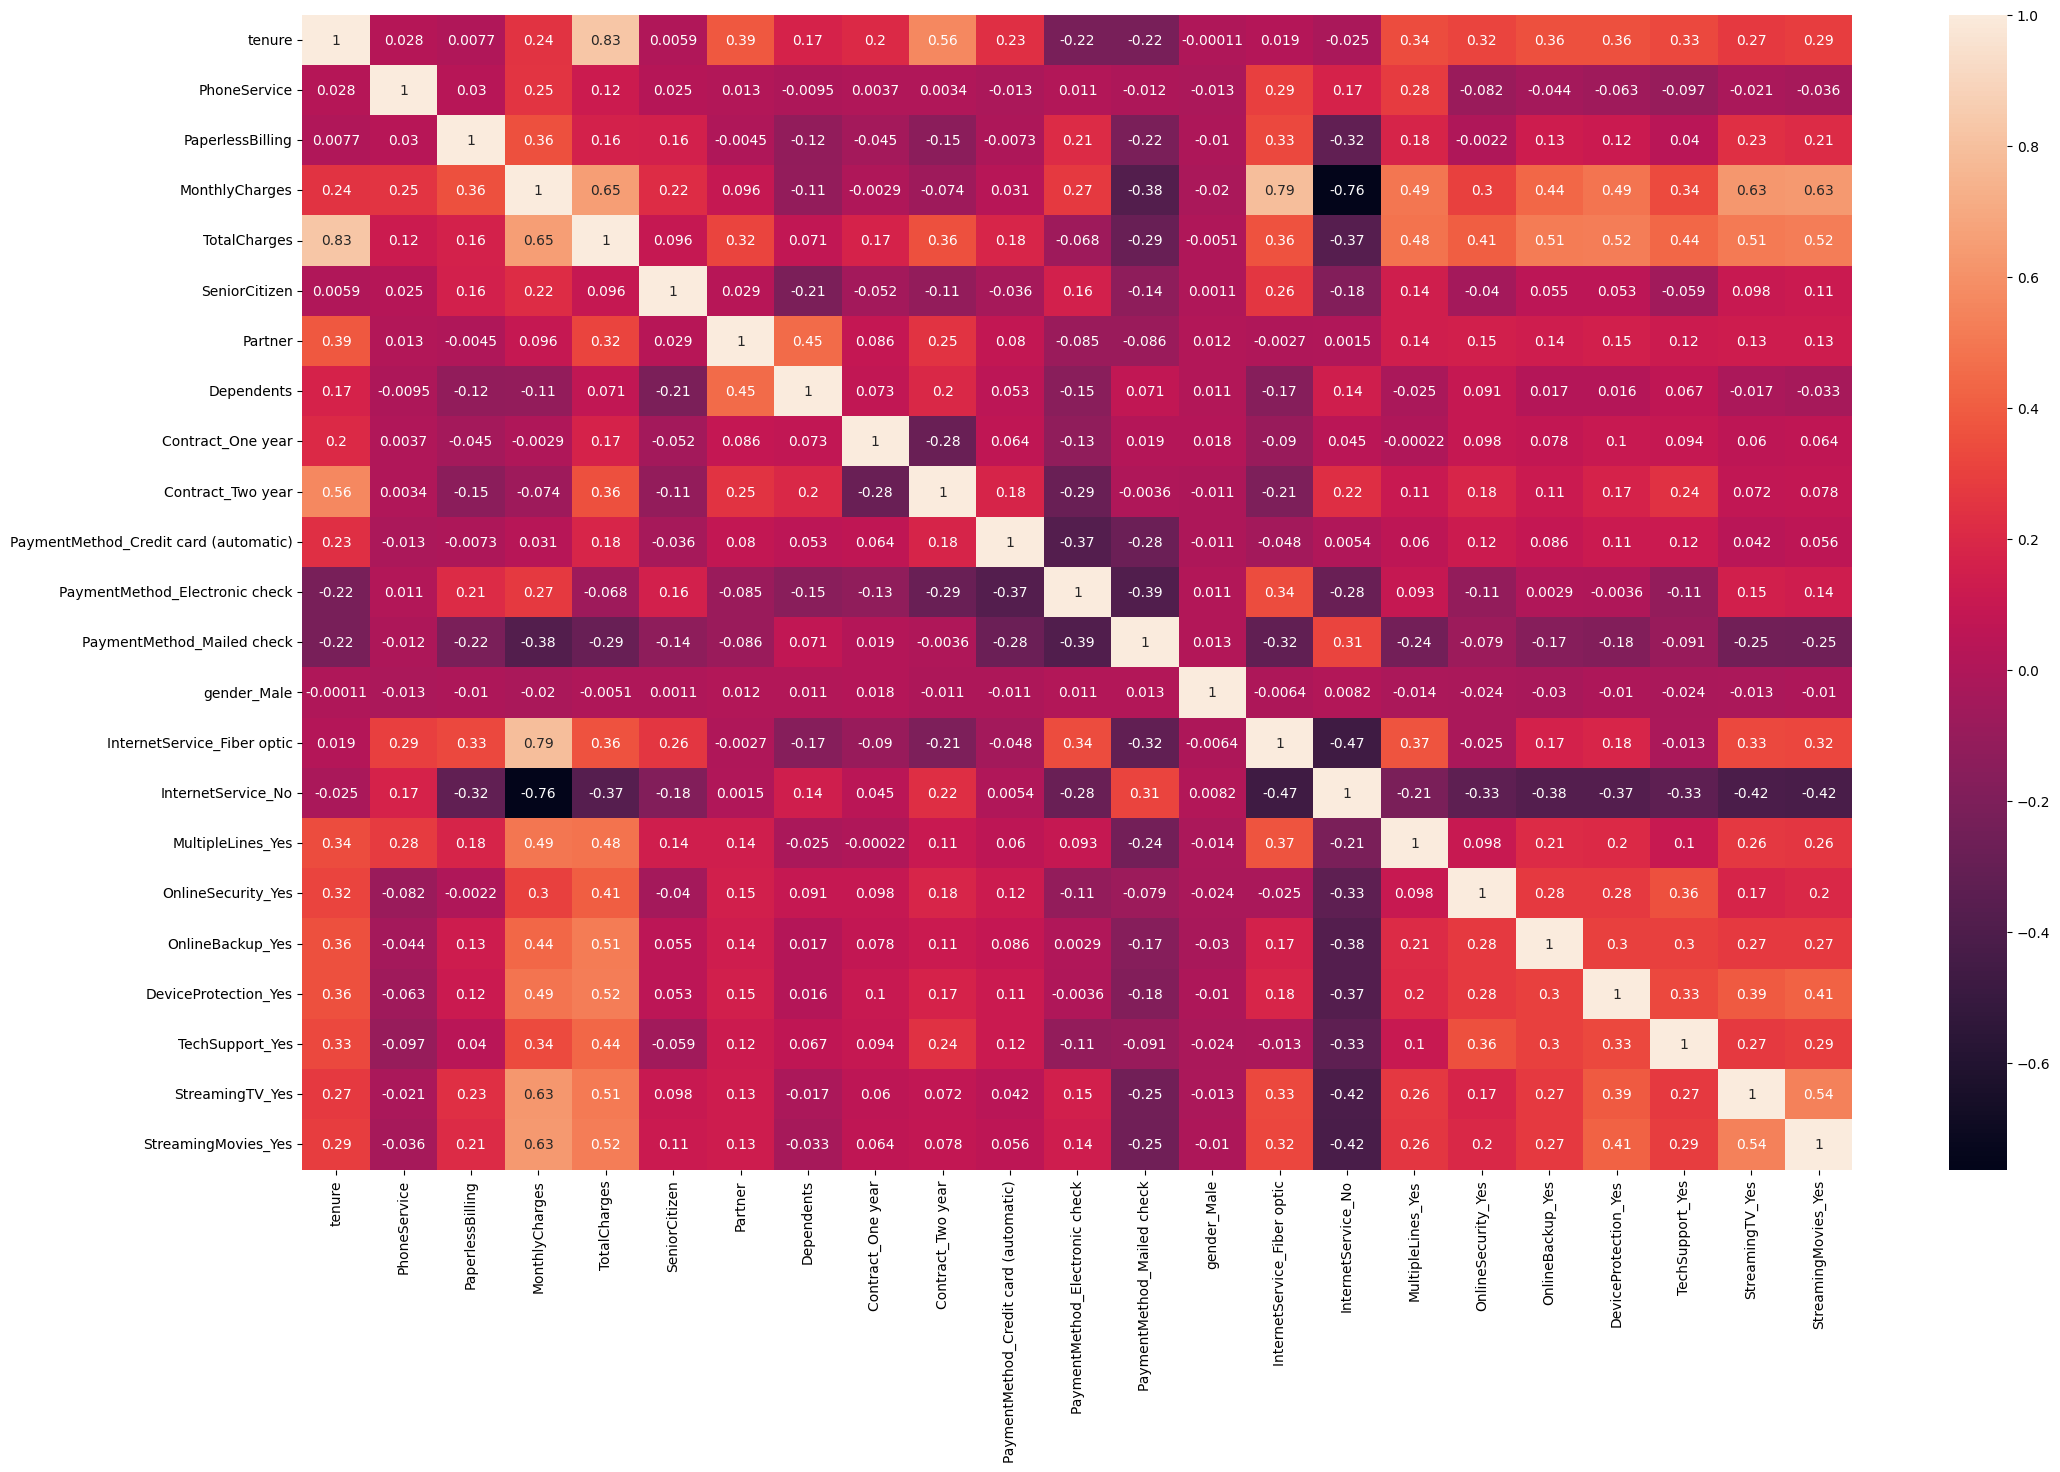

In [37]:
plt.figure(figsize=(25, 15))
sns.heatmap(data = X_train.corr(), annot=True)
plt.show()

In [38]:
X_train.isna().sum()

tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_Yes                        0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
dtype: int6

# Model Building

In [39]:
from statsmodels.api import add_constant
from statsmodels.api import GLM, families

In [40]:
# Logistic regression using stats model
X_train = add_constant(X_train)
logreg = GLM(y_train, X_train, family=families.Gamma())
logreg = logreg.fit()
print(logreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                   Gamma   Df Model:                           23
Link Function:          inverse_power   Scale:                          10.922
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 18 Jun 2023   Deviance:                   2.5604e+05
Time:                        10:35:00   Pearson chi2:                 5.35e+04
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


# Feature Selection using RFE

In [41]:
logm = LogisticRegression()

In [42]:
# logreg = GLM(y_train, X_train, family=families.Gamma())
rfe = RFE(logm, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [43]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True, False, False,  True,  True, False,
        True, False, False,  True,  True,  True])

In [44]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 10),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 9),
 ('Dependents', False, 3),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 5),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 6),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', False, 2),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 4),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [45]:
col = X_train.columns[rfe.support_]

In [46]:
X_train.columns[~rfe.support_]

Index(['const', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes'],
      dtype='object')

**Assesing the model now and selecting the best feature**

In [47]:
X_train_sm = add_constant(X_train[col])
logreg = GLM(y_train, X_train_sm, family=families.Gamma())
logreg = logreg.fit()
print(logreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                   Gamma   Df Model:                           15
Link Function:          inverse_power   Scale:                          10.878
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 18 Jun 2023   Deviance:                   2.5591e+05
Time:                        10:35:01   Pearson chi2:                 5.34e+04
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


In [48]:
y_train_pred = logreg.predict(X_train_sm)
y_train_pred

2790    0.032546
898     0.361831
3965    0.208318
5201    0.089653
1274    0.032626
          ...   
600     0.320118
5704    0.463582
1366    0.635779
1552    0.029107
4967    0.349534
Length: 4922, dtype: float64

In [49]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.03254629, 0.36183092, 0.20831789, ..., 0.63577885, 0.02910687,
       0.34953391])

# Creating a dataframe with the actual churn flag and the predicted probabilities.

In [50]:
y_train_arr = np.array(y_train).reshape(-1)

In [51]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_arr, 'Churn_prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
0,1,0.032546,2790
1,1,0.361831,898
2,0,0.208318,3965
3,0,0.089653,5201
4,0,0.032626,1274


In [52]:
y_train_pred_final['prediction'] = y_train_pred_final.Churn_prob.map( lambda x : 1 if  x > 0.5 else 0)
y_train_pred_final

,Churn,Churn_prob,CustID,prediction
0,1,0.032546,2790,0
1,1,0.361831,898,0
2,0,0.208318,3965,0
3,0,0.089653,5201,0
4,0,0.032626,1274,0
...,...,...,...,...
4917,0,0.320118,600,0
4918,0,0.463582,5704,0
4919,1,0.635779,1366,1
4920,0,0.029107,1552,0


Plotting Confusion Matrix

In [53]:
print(confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['prediction']))

[[3294  289]
 [ 708  631]]


In [54]:
print(accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['prediction']))

0.7974400650142218


In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MonthlyCharges,13.14
4,TotalCharges,10.37
1,PhoneService,7.91
0,tenure,7.00
9,InternetService_Fiber optic,6.86
10,InternetService_No,6.18
7,Contract_Two year,3.35
2,PaperlessBilling,2.90
13,StreamingTV_Yes,2.89
14,StreamingMovies_Yes,2.88


In [56]:
X_train_sm = X_train_sm.drop(columns = ['PhoneService'])
logreg = GLM(y_train, X_train_sm, family=families.Gamma())
logreg = logreg.fit()
print(logreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                   Gamma   Df Model:                           14
Link Function:          inverse_power   Scale:                          10.878
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 18 Jun 2023   Deviance:                   2.5591e+05
Time:                        10:35:01   Pearson chi2:                 5.34e+04
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MonthlyCharges,22.63
0,const,20.53
4,TotalCharges,10.31
9,InternetService_Fiber optic,7.31
1,tenure,7.00
10,InternetService_No,4.05
7,Contract_Two year,2.60
13,StreamingTV_Yes,2.19
14,StreamingMovies_Yes,2.17
12,TechSupport_Yes,1.64


In [58]:
X_train_sm = X_train_sm.drop(columns = ['SeniorCitizen'])
logreg = GLM(y_train, X_train_sm, family=families.Gamma())
logreg = logreg.fit()
print(logreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                   Gamma   Df Model:                           13
Link Function:          inverse_power   Scale:                          10.874
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 18 Jun 2023   Deviance:                   2.5591e+05
Time:                        10:35:01   Pearson chi2:                 5.34e+04
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MonthlyCharges,22.63
0,const,20.36
4,TotalCharges,10.30
8,InternetService_Fiber optic,7.28
1,tenure,6.99
9,InternetService_No,4.04
6,Contract_Two year,2.59
12,StreamingTV_Yes,2.19
13,StreamingMovies_Yes,2.16
11,TechSupport_Yes,1.63


In [60]:
X_train_sm = X_train_sm.drop(columns = ['PaymentMethod_Electronic check'])
logreg = GLM(y_train, X_train_sm, family=families.Gamma())
logreg = logreg.fit()
print(logreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                   Gamma   Df Model:                           12
Link Function:          inverse_power   Scale:                          10.892
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 18 Jun 2023   Deviance:                   2.5591e+05
Time:                        10:35:01   Pearson chi2:                 5.35e+04
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MonthlyCharges,22.63
0,const,19.77
4,TotalCharges,10.20
7,InternetService_Fiber optic,7.23
1,tenure,6.97
8,InternetService_No,4.01
6,Contract_Two year,2.55
11,StreamingTV_Yes,2.17
12,StreamingMovies_Yes,2.16
10,TechSupport_Yes,1.62


In [62]:
X_train_sm = X_train_sm.drop(columns = ['TechSupport_Yes'])
logreg = GLM(y_train, X_train_sm, family=families.Gamma())
logreg = logreg.fit()
print(logreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                   Gamma   Df Model:                           11
Link Function:          inverse_power   Scale:                          10.863
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 18 Jun 2023   Deviance:                   2.5590e+05
Time:                        10:35:02   Pearson chi2:                 5.33e+04
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MonthlyCharges,21.15
0,const,16.83
4,TotalCharges,10.09
1,tenure,6.92
7,InternetService_Fiber optic,6.38
8,InternetService_No,4.01
6,Contract_Two year,2.46
10,StreamingTV_Yes,2.14
11,StreamingMovies_Yes,2.13
5,Contract_One year,1.56


In [64]:
X_train_sm = X_train_sm.drop(columns = ['PaperlessBilling'])
logreg = GLM(y_train, X_train_sm, family=families.Gamma())
logreg = logreg.fit()
print(logreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                   Gamma   Df Model:                           10
Link Function:          inverse_power   Scale:                          10.869
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 18 Jun 2023   Deviance:                   2.5589e+05
Time:                        10:35:02   Pearson chi2:                 5.34e+04
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,21.14
0,const,14.97
3,TotalCharges,10.09
1,tenure,6.90
6,InternetService_Fiber optic,6.36
7,InternetService_No,3.98
5,Contract_Two year,2.44
9,StreamingTV_Yes,2.14
10,StreamingMovies_Yes,2.13
4,Contract_One year,1.56


In [66]:
X_train_sm = X_train_sm.drop(columns = ['OnlineSecurity_Yes'])
logreg = GLM(y_train, X_train_sm, family=families.Gamma())
logreg = logreg.fit()
print(logreg.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4912
Model Family:                   Gamma   Df Model:                            9
Link Function:          inverse_power   Scale:                          10.892
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 18 Jun 2023   Deviance:                   2.5589e+05
Time:                        10:35:02   Pearson chi2:                 5.35e+04
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,19.51
0,const,11.07
3,TotalCharges,9.99
1,tenure,6.89
6,InternetService_Fiber optic,5.45
7,InternetService_No,3.98
5,Contract_Two year,2.41
9,StreamingMovies_Yes,2.06
8,StreamingTV_Yes,2.05
4,Contract_One year,1.55


In [68]:
X_train_sm = X_train_sm.drop(columns = ['StreamingMovies_Yes'])
logreg = GLM(y_train, X_train_sm, family=families.Gamma())
logreg = logreg.fit()
print(logreg.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4913
Model Family:                   Gamma   Df Model:                            8
Link Function:          inverse_power   Scale:                          10.914
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 18 Jun 2023   Deviance:                   2.5588e+05
Time:                        10:35:02   Pearson chi2:                 5.36e+04
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,15.99
3,TotalCharges,9.99
0,const,8.56
1,tenure,6.89
6,InternetService_Fiber optic,4.79
7,InternetService_No,3.76
5,Contract_Two year,2.41
8,StreamingTV_Yes,2.04
4,Contract_One year,1.55


In [70]:
X_train_sm = X_train_sm.drop(columns = ['StreamingTV_Yes'])
logreg = GLM(y_train, X_train_sm, family=families.Gamma())
logreg = logreg.fit()
print(logreg.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4914
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                          10.943
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 18 Jun 2023   Deviance:                   2.5587e+05
Time:                        10:35:02   Pearson chi2:                 5.38e+04
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,11.99
3,TotalCharges,9.99
1,tenure,6.89
0,const,5.88
6,InternetService_Fiber optic,4.06
7,InternetService_No,3.50
5,Contract_Two year,2.41
4,Contract_One year,1.55


In [72]:
X_train_sm = X_train_sm.drop(columns = ['MonthlyCharges'])
logreg = GLM(y_train, X_train_sm, family=families.Gamma())
logreg = logreg.fit()
print(logreg.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4915
Model Family:                   Gamma   Df Model:                            6
Link Function:          inverse_power   Scale:                          10.958
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 18 Jun 2023   Deviance:                   2.5587e+05
Time:                        10:35:03   Pearson chi2:                 5.39e+04
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,6.58
1,tenure,6.10
0,const,5.15
4,Contract_Two year,2.36
5,InternetService_Fiber optic,1.76
6,InternetService_No,1.76
3,Contract_One year,1.53


In [74]:
X_train_sm = X_train_sm.drop(columns = ['TotalCharges'])
logreg = GLM(y_train, X_train_sm, family=families.Gamma())
logreg = logreg.fit()
print(logreg.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4916
Model Family:                   Gamma   Df Model:                            5
Link Function:          inverse_power   Scale:                          10.989
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 18 Jun 2023   Deviance:                   2.5585e+05
Time:                        10:35:03   Pearson chi2:                 5.40e+04
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.02
3,Contract_Two year,2.35
1,tenure,2.08
2,Contract_One year,1.52
4,InternetService_Fiber optic,1.37
5,InternetService_No,1.36


In [76]:
y_train_pred = logreg.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_arr = np.array(y_train).reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train_arr, 'Churn_prob': y_train_pred})
y_train_pred_final['churn_pred'] = y_train_pred_final.Churn_prob.map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,churn_pred
0,1,0.028706,0
1,1,0.632402,1
2,0,0.126158,0
3,0,0.080414,0
4,0,0.028310,0


In [77]:
col = X_train_sm.columns

In [78]:
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
4253,-0.420537,1,1,0.790493,-0.172145,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0
2914,-0.011881,1,1,-0.001687,-0.116765,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1569,-0.706597,1,0,-0.616538,-0.720534,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5227,-1.033522,1,0,1.037427,-0.720424,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,1
4427,0.682834,1,0,1.184925,1.162883,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,1,1


In [79]:
X_test_sm = add_constant(X_test)
X_test_sm = X_test_sm[col]
X_test_sm.head()

,const,tenure,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
4253,1.0,-0.420537,0,0,1,0
2914,1.0,-0.011881,1,0,0,0
1569,1.0,-0.706597,0,0,0,0
5227,1.0,-1.033522,0,0,1,0
4427,1.0,0.682834,0,1,1,0


In [80]:
y_test_pred = logreg.predict(X_test_sm)

In [81]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred

array([0.50313663, 0.11491515, 0.30384392, ..., 0.1353111 , 0.02384058,
       0.25637389])

In [82]:
y_test_arr = np.array(y_test).reshape(-1)

In [83]:
y_test_pred_final = pd.DataFrame({'Churn':y_test_arr, 'Churn_prob': y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_prob,CustID
0,0,0.503137,4253
1,0,0.114915,2914
2,0,0.303844,1569
3,0,0.725615,5227
4,0,0.028739,4427


In [84]:
y_test_pred_final['churn_pred'] = y_test_pred_final.Churn_prob.map(lambda x : 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_prob,CustID,churn_pred
0,0,0.503137,4253,1
1,0,0.114915,2914,0
2,0,0.303844,1569,0
3,0,0.725615,5227,1
4,0,0.028739,4427,0


In [85]:
confusion = confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['churn_pred'])

In [86]:
print(round(accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['churn_pred']), 4))

0.7938


# Metrics Beyond Accuracy

In [87]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

### Calculating the sensitivity of current model

In [88]:
sensitivity = TP / float(TP + FN)
print('The sensitivity of given matrix is ', round(sensitivity, 4))

The sensitivity of given matrix is  0.4302


In [89]:
specificity = TN / float(TN + FP)
print('The Specificity of given matrix is ', round(specificity, 4))

The Specificity of given matrix is  0.9158


### Plottig ROC curve
An ROC curves demostrates several things.

1. It shows the tradeoff between sensitivity and specificity that is any increase in sensitivity will results into decrease in specificity vice versa.

2. The closer the curve follows the left-hand border and then top border of the ROC space, the more accurate the test is.

3. The closer the curve comes to 45 - degree diagnonal of the ROC space, the less accurate the test is.

In [90]:
def plot_roc(actual, probs):
  fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate = False)

  auc_score = roc_auc_score(actual, probs)
  plt.figure(figsize=(15,6) )
  plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % auc_score)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel(' False positive Rate ')
  plt.ylabel(' True Positive Rate ')
  plt.title(' Receiver Operating Charateristics Curve')
  plt.legend(loc = 'lower right')
  plt.show()

  return None

In [91]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final['Churn'], y_test_pred_final['churn_pred'])
print(fpr)
print(tpr)
print(thresholds)

[0.         0.08417722 1.        ]
[0.         0.43018868 1.        ]
[2 1 0]


## AUC ROC curve on train data

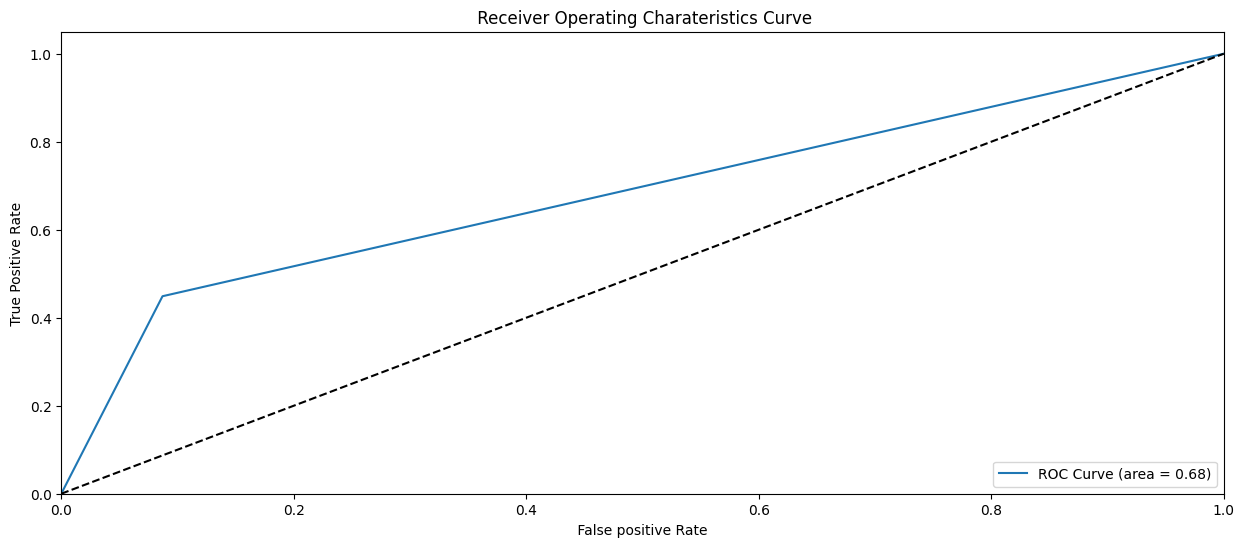

In [92]:
plot_roc(y_train_pred_final['Churn'], y_train_pred_final['churn_pred'])

## AUC-ROC on test data

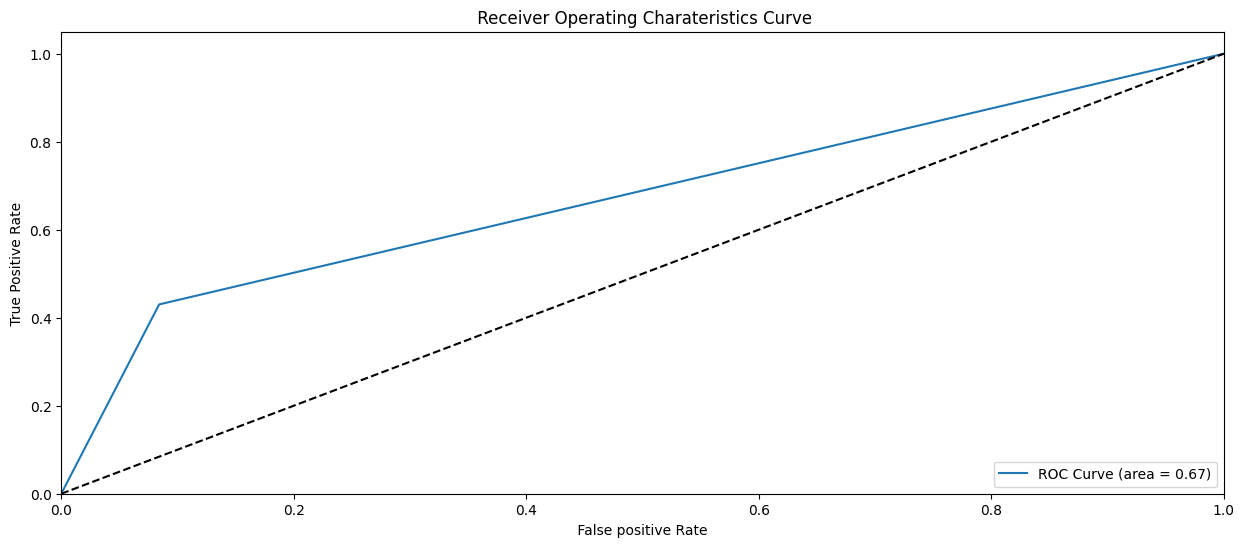

In [93]:
plot_roc(y_test_pred_final['Churn'], y_test_pred_final['churn_pred'])

Note: The ultimate cut-off is where we can balance the sensitivity and specificity.

In [96]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
  y_train_pred_final[i] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.028706,0,1,0,0,0,0,0,0,0,0,0
1,1,0.632402,1,1,1,1,1,1,1,1,0,0,0
2,0,0.126158,0,1,1,0,0,0,0,0,0,0,0
3,0,0.080414,0,1,0,0,0,0,0,0,0,0,0
4,0,0.028310,0,1,0,0,0,0,0,0,0,0,0


In [98]:
cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
  cm = confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final[i])
  total = sum(sum(cm))
  accuracy = (cm[0,0] + cm[1,1])/total

  speci = cm[0,0]/(cm[0,0] + cm[0,1])
  sensi = cm[1,1]/(cm[1,0] + cm[1,1])

  cutoff_df.loc[i] = [i, accuracy, sensi, speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.272044  1.000000  0.000000
0.1   0.1  0.555668  0.971621  0.400223
0.2   0.2  0.708046  0.843167  0.657550
0.3   0.3  0.755587  0.784167  0.744907
0.4   0.4  0.783828  0.533234  0.877477
0.5   0.5  0.786672  0.448842  0.912922
0.6   0.6  0.786266  0.372666  0.940832
0.7   0.7  0.776107  0.280807  0.961206
0.8   0.8  0.759854  0.170276  0.980184
0.9   0.9  0.727956  0.000000  1.000000


<Figure size 1500x600 with 0 Axes>

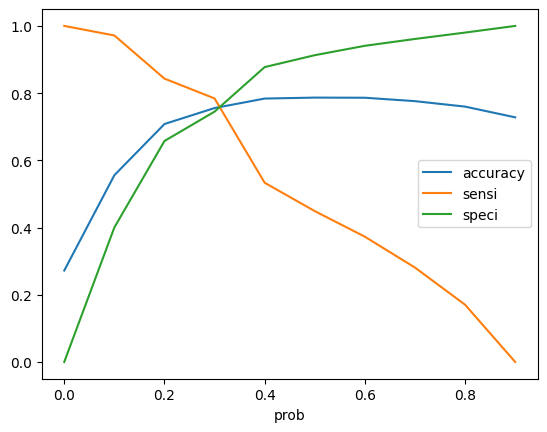

In [103]:
plt.figure(figsize=(15,6))
cutoff_df.plot.line(x='prob', y = ['accuracy', 'sensi', 'speci'])
plt.show()

**From the above curve we can say that approx 0.35 is an optimal cut-off value.**

In [100]:
y_train_pred_final['final_pred'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
0,1,0.028706,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.632402,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.126158,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.080414,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.028310,0,1,0,0,0,0,0,0,0,0,0,0


In [105]:
confusion = confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['final_pred'])

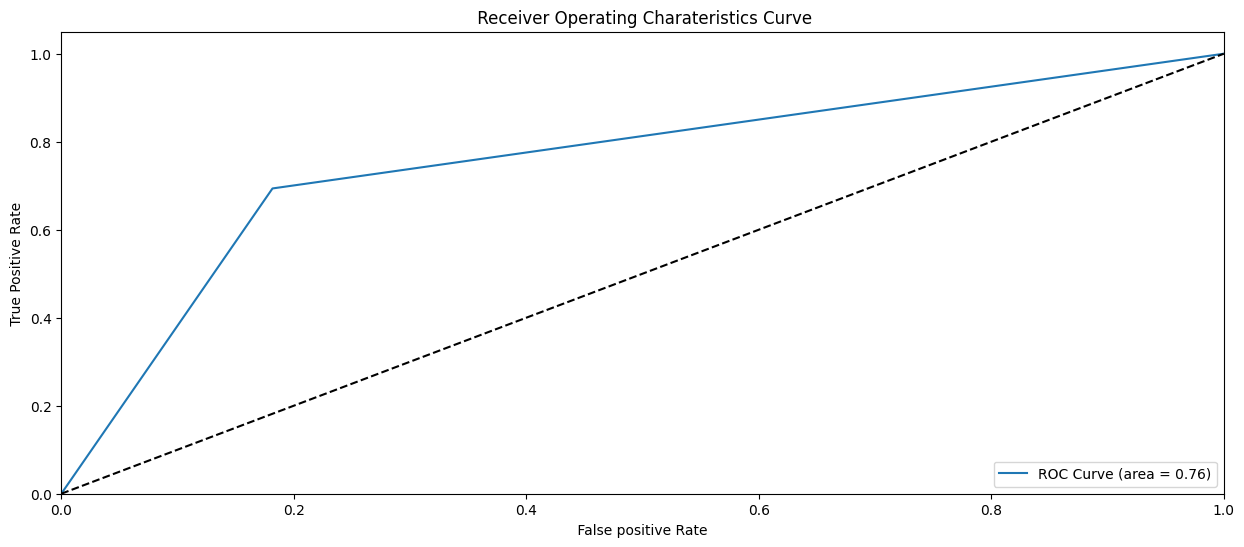

In [102]:
plot_roc(y_train_pred_final['Churn'], y_train_pred_final['final_pred'])

# Precision and Recall

***Precison***

In [106]:
precision = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print(precision)

0.5879746835443038


***Recall***

In [107]:
recall = confusion[1,1]/(confusion[1,0] + confusion[1,1])
print(recall)

0.6938013442867812


In [110]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Churn'], y_train_pred_final['final_pred'])

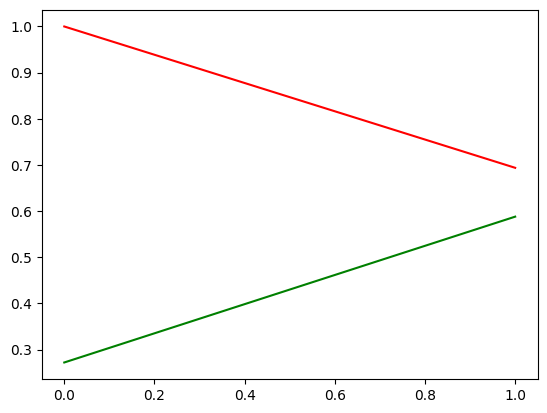

In [111]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Prediction on Test Data

In [113]:
y_test_pred_final['final_pred'] = y_test_pred_final.Churn_prob.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,Churn,Churn_prob,CustID,churn_pred,final_pred
0,0,0.503137,4253,1,1
1,0,0.114915,2914,0,0
2,0,0.303844,1569,0,0
3,0,0.725615,5227,1,1
4,0,0.028739,4427,0,0


In [114]:
confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['final_pred'])

array([[1303,  277],
       [ 183,  347]])

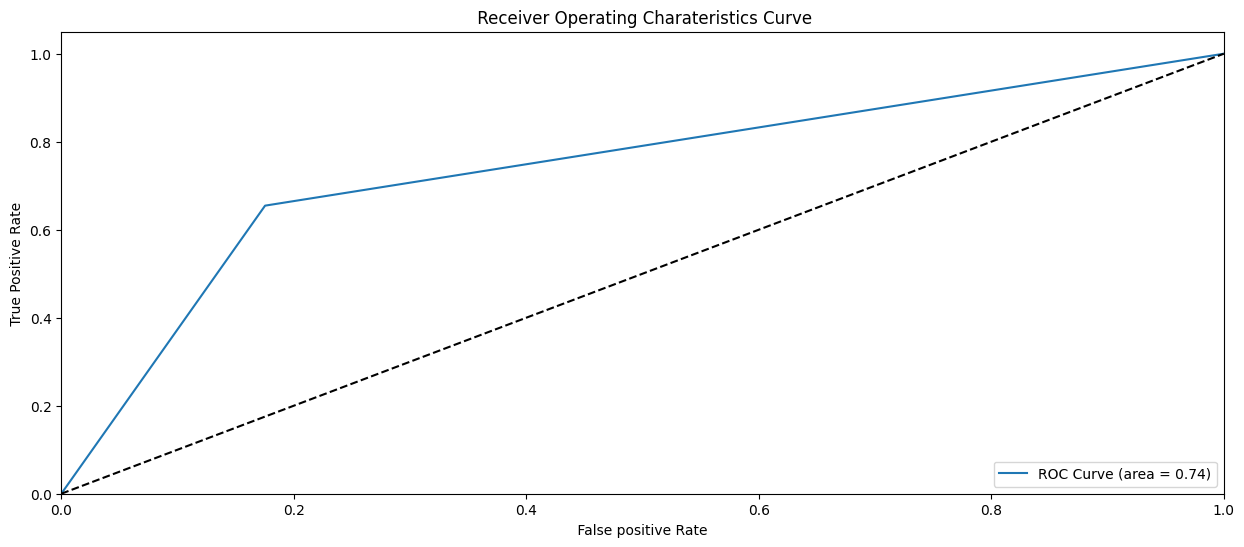

In [115]:
plot_roc(y_test_pred_final['Churn'], y_test_pred_final['final_pred'])